# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

267

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [54]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities=cities #Sample

City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]

i=0

print("Beginning Data Retrieval")
print("-----------------------------")


for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
        
    try:

        cld=weather_json["clouds"]["all"]
        ct=weather_json["sys"]["country"]
        wt=weather_json["dt"]
        hm=weather_json["main"]["humidity"]
        lt=weather_json["coord"]["lat"]
        lg=weather_json["coord"]["lon"]
        mx=weather_json["coord"]["lon"]
        mn=weather_json["main"]["temp_min"]
   
    except KeyError:
        print("Oops!  That was no valid number.  Try again...")
        
    i=i+1
    City.append(city)
    Cloudiness.append(cld)
    Country.append(ct)
    Date.append(wt)
    Humidity.append(hm)
    Lat.append(lt)
    Lng.append(lg)
    Max_Temp.append(mx)
    Wind_Speed.append(mn)
    print(f"Processing Record {i} of Set 1 | {city}")
    
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | tasiilaq
Oops!  That was no valid number.  Try again...
Processing Record 3 of Set 1 | taolanaro
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | cardston
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | los llanos de aridane
Oops!  That was no valid number.  Try again...
Processing Record 10 of Set 1 | kazalinsk
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | cocula
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | arraial do cabo
Oops!  That was no valid number.  Try again...
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | vain

Oops!  That was no valid number.  Try again...
Processing Record 180 of Set 1 | grand centre
Processing Record 181 of Set 1 | savannakhet
Processing Record 182 of Set 1 | obo
Processing Record 183 of Set 1 | thompson
Oops!  That was no valid number.  Try again...
Processing Record 184 of Set 1 | paradwip
Processing Record 185 of Set 1 | pevek
Processing Record 186 of Set 1 | wuda
Oops!  That was no valid number.  Try again...
Processing Record 187 of Set 1 | ruatoria
Processing Record 188 of Set 1 | guider
Processing Record 189 of Set 1 | bonthe
Processing Record 190 of Set 1 | luderitz
Processing Record 191 of Set 1 | manica
Processing Record 192 of Set 1 | oyem
Processing Record 193 of Set 1 | raudeberg
Processing Record 194 of Set 1 | camacha
Processing Record 195 of Set 1 | idenao
Processing Record 196 of Set 1 | bluff
Processing Record 197 of Set 1 | comodoro rivadavia
Processing Record 198 of Set 1 | saskylakh
Processing Record 199 of Set 1 | phuket
Processing Record 200 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
df=pd.DataFrame({"City":City, "Cloudiness":Cloudiness,"Country":Country, "Date":Date,
                 "Humidity":Humidity,"Lat":Lat,"Lng":Lng,"Max Temp":Max_Temp,"Wind_Speed":Wind_Speed})
df.count()

City          267
Cloudiness    267
Country       267
Date          267
Humidity      267
Lat           267
Lng           267
Max Temp      267
Wind_Speed    267
dtype: int64

In [56]:
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,jamestown,0,AU,1569879684,46,-33.21,138.60,138.60,285.70
1,tasiilaq,75,GL,1569879793,52,65.61,-37.64,-37.64,279.15
2,taolanaro,75,GL,1569879793,52,65.61,-37.64,-37.64,279.15
3,tuatapere,29,NZ,1569879789,77,-46.13,167.69,167.69,279.82
4,victoria,90,BN,1569879774,94,5.28,115.24,115.24,297.04
5,yar-sale,100,RU,1569879824,97,66.83,70.83,70.83,276.00
6,cardston,1,CA,1569880075,74,49.20,-113.32,-113.32,270.93
7,codrington,75,AU,1569879759,72,-28.95,153.24,153.24,290.15
8,los llanos de aridane,40,ES,1569879797,78,28.66,-17.92,-17.92,294.82
9,kazalinsk,40,ES,1569879797,78,28.66,-17.92,-17.92,294.82


In [57]:
df.to_csv("output.csv", index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

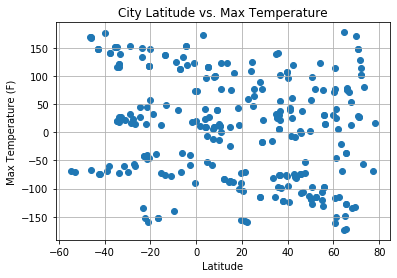

In [58]:
plt.scatter(Lat,Max_Temp)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

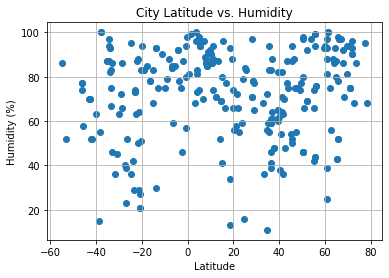

In [59]:
plt.scatter(Lat,Humidity)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

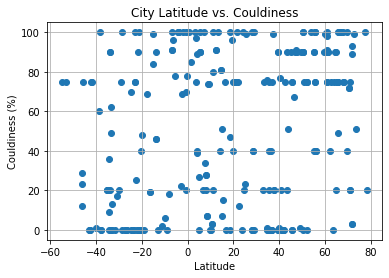

In [60]:
plt.scatter(Lat,Cloudiness)
plt.title("City Latitude vs. Couldiness")
plt.xlabel("Latitude")
plt.ylabel("Couldiness (%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

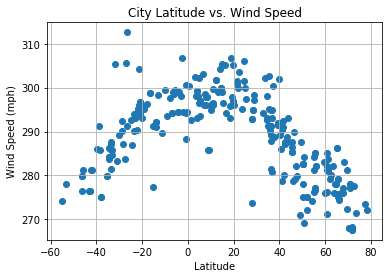

In [61]:
plt.scatter(Lat,Wind_Speed)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [62]:
# OPTIONAL: Create a function to create Linear Regression plots


In [63]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere=df[df["Lat"]>0]
Southern_Hemisphere=df[df["Lat"]<0]

In [64]:
Northern_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
1,tasiilaq,75,GL,1569879793,52,65.61,-37.64,-37.64,279.15
2,taolanaro,75,GL,1569879793,52,65.61,-37.64,-37.64,279.15
4,victoria,90,BN,1569879774,94,5.28,115.24,115.24,297.04
5,yar-sale,100,RU,1569879824,97,66.83,70.83,70.83,276.00
6,cardston,1,CA,1569880075,74,49.20,-113.32,-113.32,270.93


In [65]:
Southern_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,jamestown,0,AU,1569879684,46,-33.21,138.60,138.60,285.70
3,tuatapere,29,NZ,1569879789,77,-46.13,167.69,167.69,279.82
7,codrington,75,AU,1569879759,72,-28.95,153.24,153.24,290.15
13,puerto ayora,20,EC,1569879779,57,-0.74,-90.35,-90.35,294.26
14,carnarvon,17,ZA,1569879812,45,-30.97,22.13,22.13,283.30


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

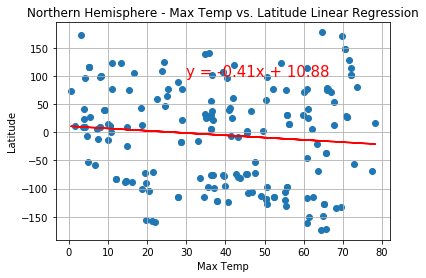

In [66]:
y_values = Northern_Hemisphere["Max Temp"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,100),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

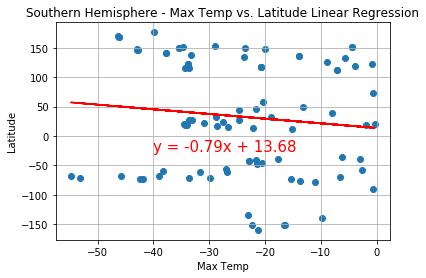

In [67]:
y_values = Southern_Hemisphere["Max Temp"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,-25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

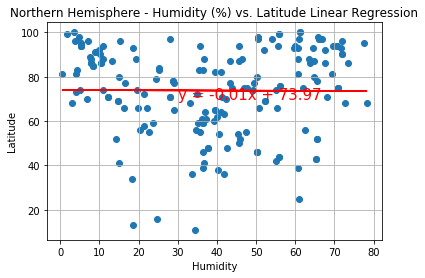

In [68]:
y_values = Northern_Hemisphere["Humidity"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,70),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

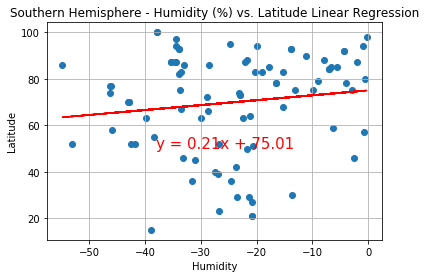

In [69]:
y_values = Southern_Hemisphere["Humidity"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-38,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

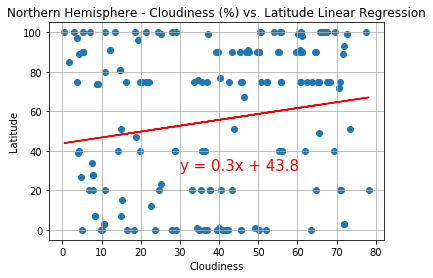

In [70]:
y_values = Northern_Hemisphere["Cloudiness"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

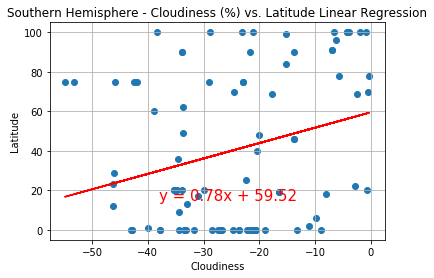

In [71]:
y_values = Southern_Hemisphere["Cloudiness"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-38,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

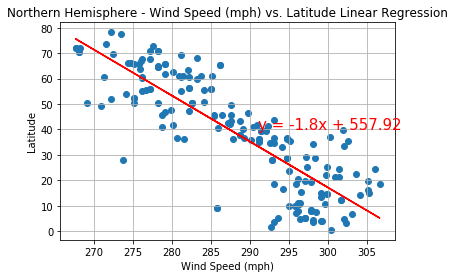

In [72]:
x_values = Northern_Hemisphere["Wind_Speed"]
y_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(291,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

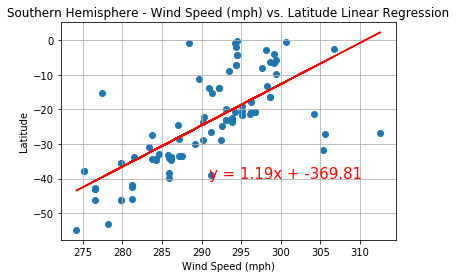

In [73]:
x_values = Southern_Hemisphere["Wind_Speed"]
y_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(291,-40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.show()